In [1]:
import networkx as nx
import pylab as plt
import pandas as pd
import numpy as np
import math
from operator import itemgetter
from timeit import default_timer as timer

C:\Users\allen\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Page Rank

<AxesSubplot:xlabel='Autori', ylabel='PR value'>

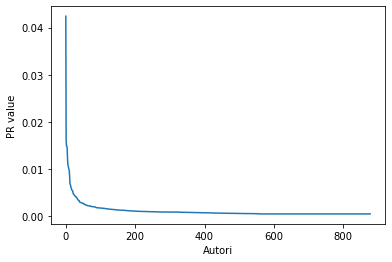

In [2]:
PR_df = pd.read_csv('./PR_df.csv')
PR_df.sort_values(by='0',inplace = True, ascending=False)
PR_df.reset_index(drop = True, inplace = True)

plt.xlabel('Autori')
plt.ylabel('PR value')
PR_df['0'].plot()

In [3]:
PR_df['0'].max()

0.0424140089724826

In [4]:
PR_df['0'].min()

0.0004834505536795

In [5]:
PR_df['0'].sum()

0.9999999999999497

In [6]:
PR_df.columns
PR_df.rename(columns={'Unnamed: 0':'Author', '0':'PR_values'}, inplace = True)
PR_df

Author  PR_values
0    7c7699a363945e1b8c78c1cb3033b2871ff3dd535455d5...   0.042414
1    6931225d86818ee20b88f9c580fb0e8f918ba1f09b916b...   0.015953
2    ba0b01a499f90eb8110ed4d3cd35df37fbe631438ef175...   0.014931
3    7903ef60294057eaa94449fb3ef10feb9a0a770068e96c...   0.014887
4    87d3de23039c93bae7e85b1478e409191c5cec254487e4...   0.014411
..                                                 ...        ...
873  a354fe2d82ec506d3b4edcc32c95dbc378d7715bad268d...   0.000483
874  a34d59563902e910a1c2d709156d580da9b92f02c70d3e...   0.000483
875  a33667d5315320584dcdf350f9ad3ef8cebe9c3f038414...   0.000483
876  a0d4373ce60c02c7ef26814deb9d61687da1b3fdba873f...   0.000483
877  00168ef7c9a4fed70901c32e2a3311a60893e328859fcd...   0.000483

[878 rows x 2 columns]

# Communities Detection

In [7]:
DF = pd.read_csv('./AM_Matrix.csv')
DF.rename(columns={'Unnamed: 0':'From'}, inplace = True)
DF.set_index('From',inplace = True,drop=True)
DF

00168ef7c9a4fed70901c32e2a3311a60893e328859fcd615100cf40da97344e  \
From                                                                                                                   
00168ef7c9a4fed70901c32e2a3311a60893e328859fcd6...                                                  0                  
00a5614eecf54e2d713de00b7a6a75814ca14d573277911...                                                  0                  
00ef89995ea4bb4aa275935f61e7a0e088efbc28666464b...                                                  0                  
00f1809b78bdb4854c678a8900fca8c0454b78bc5a41811...                                                  0                  
010d2592c5ebdfdb9828fdf01e0f0e0a2c35734e9f0f653...                                                  0                  
...                                                                                               ...                  
fe8853528bdee7911b91829edffd3479ee6376168c87906...                                                  0                  
feca281ea68a9c47ec6fb59ec5d9f31d76105ad9d058a0d...                                                  0                  
ff24acad38556b1c8d521f449c0399008632be8d96b0c25...                                                  0                  
ff665fdeae13e20a855549e1e389b3992088650b2feea22...                                                  0                  
ff9af28010b1a78e3af698c64734cecf907988b927435d9...                                                  0                  

                                                    00a5614eecf54e2d713de00b7a6a75814ca14d5732779117f77346fa01ddca12  \
From                                                                                                                   
00168ef7c9a4fed70901c32e2a3311a60893e328859fcd6...                                                  0                  
00a5614eecf54e2d713de00b7a6a75814ca14d573277911...                                                  0                  
00ef89995ea4bb4aa275935f61e7a0e088efbc28666464b...                                                  0                  
00f1809b78bdb4854c678a8900fca8c0454b78bc5a41811...                                                  0                  
010d2592c5ebdfdb9828fdf01e0f0e0a2c35734e9f0f653...                                                  0                  
...                                                                                               ...                  
fe8853528bdee7911b91829edffd3479ee6376168c87906...                                                  0                  
feca281ea68a9c47ec6fb59ec5d9f31d76105ad9d058a0d...                                                  0                  
ff24acad38556b1c8d521f449c0399008632be8d96b0c25...                                                  0                  
ff665fdeae13e20a855549e1e389b3992088650b2feea22...                                                  0                  
ff9af28010b1a78e3af698c64734cecf907988b927435d9...                                                  0                  

                                                    00ef89995ea4bb4aa275935f61e7a0e088efbc28666464b11d6dd409616db1a2  \
From                                                                                                                   
00168ef7c9a4fed70901c32e2a3311a60893e328859fcd6...                                                  0                  
00a5614eecf54e2d713de00b7a6a75814ca14d573277911...                                                  0                  
00ef89995ea4bb4aa275935f61e7a0e088efbc28666464b...                                                  0                  
00f1809b78bdb4854c678a8900fca8c0454b78bc5a41811...                                                  0                  
010d2592c5ebdfdb9828fdf01e0f0e0a2c35734e9f0f653...                                                  0                  
...                                                                                       

In [8]:
CDF = pd.read_csv('./Clusters_DF_Computed.csv')
CDF.rename(columns={'0':'Communities', '1':'Q'}, inplace = True)
CDF

Communities         Q
0    ['00168ef7c9a4fed70901c32e2a3311a60893e328859f... -0.000804
1    ['00168ef7c9a4fed70901c32e2a3311a60893e328859f...  0.000791
2    ['00168ef7c9a4fed70901c32e2a3311a60893e328859f...  0.002385
3    ['00168ef7c9a4fed70901c32e2a3311a60893e328859f...  0.003972
4    ['00168ef7c9a4fed70901c32e2a3311a60893e328859f...  0.005543
..                                                 ...       ...
821  ['aaed2e86214195c2a43150d0e6a4e288976f826ed593...  0.551238
822  ['aaed2e86214195c2a43150d0e6a4e288976f826ed593...  0.504777
823  ['aaed2e86214195c2a43150d0e6a4e288976f826ed593...  0.372980
824  ['aaed2e86214195c2a43150d0e6a4e288976f826ed593...  0.061689
825  ['aaed2e86214195c2a43150d0e6a4e288976f826ed593...       NaN

[826 rows x 2 columns]

<AxesSubplot:xlabel='Iterazioni/Merge', ylabel='Q value'>

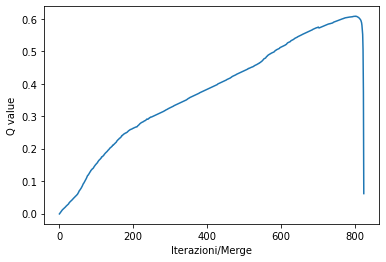

In [9]:
plt.xlabel('Iterazioni/Merge')
plt.ylabel('Q value')
CDF['Q'].plot()

In [10]:
CDF.iloc[CDF[CDF['Q']==CDF['Q'].max()].index[0]]

Communities    ['aaed2e86214195c2a43150d0e6a4e288976f826ed593...
Q                                                       0.607447
Name: 801, dtype: object

In [31]:
Best_Clusters_DF = pd.read_csv('./Best_Clusters_DF.csv')
Best_Clusters_DF.sort_values(by='cluster_size',inplace = True)

Best_Clusters_DF.reset_index(drop = True, inplace = True)
Best_Clusters_DF

cluster_authors  cluster_size
0   aaed2e86214195c2a43150d0e6a4e288976f826ed59325...             2
1   986eb8217077dcad2f72d1d47d64c1c1b3baee08674830...             2
2   9c02ad40ca501589752fd615c65651090b31e0d5b1fc2c...             2
3   9d08cafdcb8dd5466da8a8aaf2bfcc03ad6a0c117f3c5f...             2
4   a3e78182b1e6ec597dafb30ea49c54638dcba23a860760...             2
..                                                ...           ...
64  3c03e7028f7e347ac3722e9ed6bf58cbbde2f4843272c1...            45
65  34f728f16a77be8ea59ae8cc8a1cc1b386aef0d880ce62...            55
66  e0501caf31643f548e9c4ad89186e1bc63d7564851f165...            61
67  db9580ca3f3512baa130191ddf2e067fbffc339af4e59a...            92
68  fa82e5c8d2633cfb3a8ad4faf4d18e01ab13e4c1ba8acd...           210

[69 rows x 2 columns]

In [32]:
Best_Clusters_DF.cluster_size.mean()

12.623188405797102

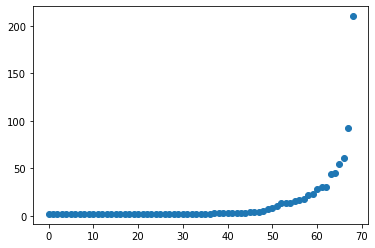

In [33]:
plt.scatter(Best_Clusters_DF.index,Best_Clusters_DF.cluster_size)

(array([63.,  4.,  1.,  0.,  1.]),
 array([  2. ,  43.6,  85.2, 126.8, 168.4, 210. ]),
 <BarContainer object of 5 artists>)

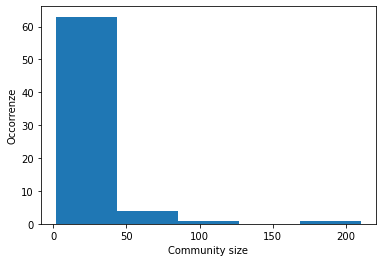

In [34]:
#Best_Clusters_DF['cluster_size'].plot()
plt.xlabel('Community size')
plt.ylabel('Occorrenze')

plt.hist(Best_Clusters_DF['cluster_size'], bins = [  2. ,  43.6,  85.2, 126.8, 168.4, 210. ])

871
871


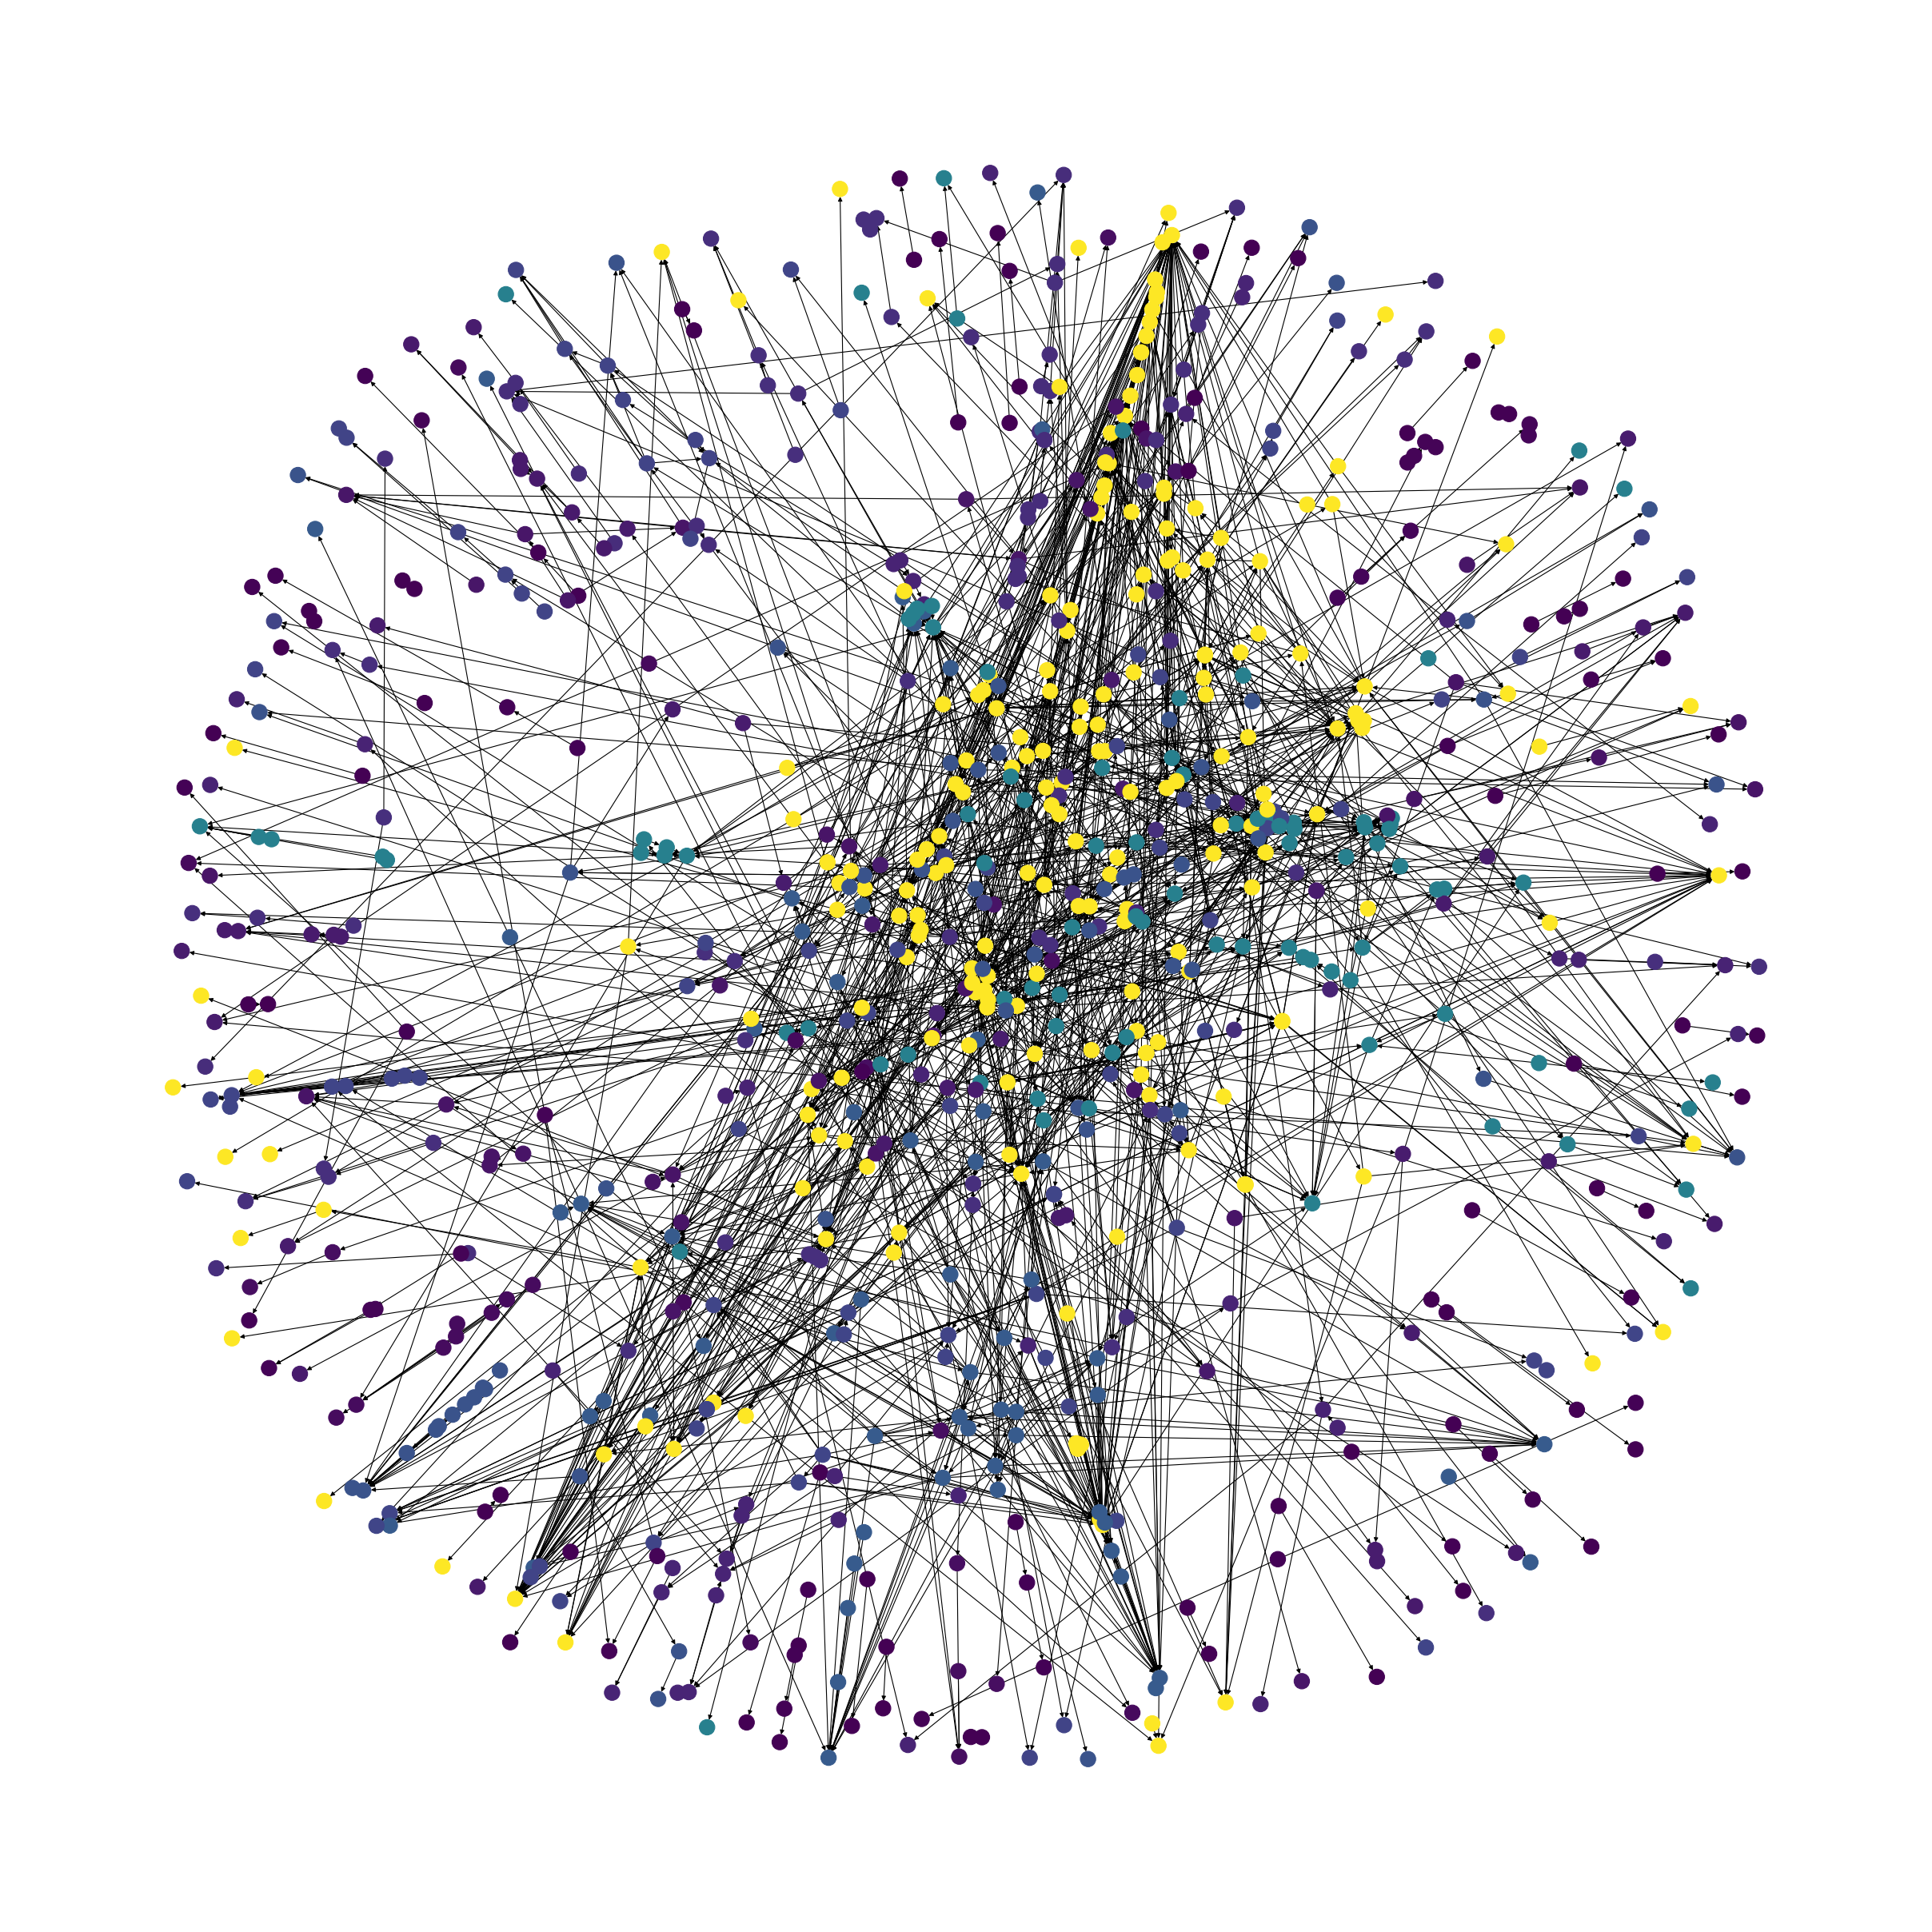

In [49]:
#GRAPH CREATION
from matplotlib.pyplot import figure
for i in DF.columns.values:
    DF.loc[i][i] = 0


#STAMPA GRAFO
D=nx.DiGraph()

#for i in DF.columns.values:
#    D.add_node(str(i),nodeId = str(i))
    
for i in DF.columns.values: 
    for j in DF.columns.values:
        w = DF.loc[i][j]
        if(i!=j and w > 0):           
            
            D.add_weighted_edges_from([(str(i),str(j),w)])


#GRAPH COLORS BASED ON COMMUNITIES

color_map = []
for node in D:
    for j in range(len(Best_Clusters_DF)):
        #splitted = Best_Clusters_DF.iloc[j]['cluster_authors'].split("-")
        if(node in Best_Clusters_DF.iloc[j]['cluster_authors']):
            color_map.append(Best_Clusters_DF.iloc[j]['cluster_size'])
            continue
print(len(D.nodes))
print(len(color_map))


figure(figsize=(30, 30), dpi=80)

nx.draw(D, node_color=color_map, with_labels=False)
plt.show()

[  2   3   4   5   7   8  10  13  14  16  17  18  22  23  28  30  44  45
  55  61  92 210]


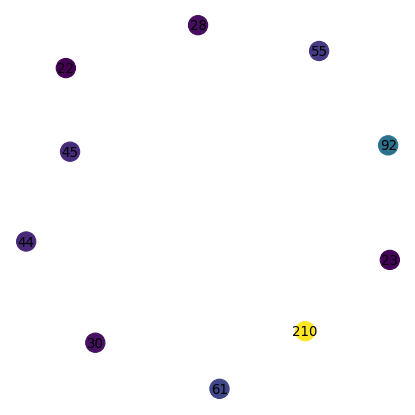

In [62]:
#GRAPH CREATION

#STAMPA GRAFO
D_COLOR=nx.DiGraph()

#dim clusters: [  2   3   4   5   7   8  10  13  14  16  17  18  22  23  28  30  44  45 55  61  92 210]


values = np.unique(Best_Clusters_DF.cluster_size.values)

values_scelti = [22,23 , 28 , 30 , 44 , 45, 55 , 61 , 92,210]

print(values)
for i in values_scelti:
    D_COLOR.add_node(i)
    
figure(figsize=(5, 5), dpi=80)

nx.draw(D_COLOR, node_color=values_scelti, with_labels=True)
plt.show()
    
#SERVE PER CAPIRE QUALI COLORI SONO UTILIZZATI DA QUALE COMMUNITY => QUI ABBIAMO ASSOCIATO IL COLORE ALLA DIMENSIONE


# Communities validation

In [64]:
paperId_and_info_and_date_Seed = pd.read_csv('./paperId_and_info_and_date_Seed.csv')
paperId_and_info_and_date_Seed

ToNodeId                                              Title  \
0      9912289          Gauge Fixing in the Chain by Chain Method   
1      9412202  Conformal, Integrable and Topological Theories...   
2      9412201  The Problem of Ground State in Thermo-Field Dy...   
3      9806220  Dynamical Lorentz simmetry breaking from 3+1 A...   
4      9911246  Magnetic Interactions of D-branes and Wess-Zum...   
...        ...                                                ...   
1732   9812254  Theory of Stochastic Space-Time. 1. Gravitatio...   
1733   9605221  Three-Family $SO(10)$ Grand Unification in Str...   
1734   9709214       Soliton Solutions of M-theory on an Orbifold   
1735   9707223  Gaugino Condensation, Moduli Potentials and Su...   
1736   9912206  Target-Space Duality in Heterotic and Type I E...   

                                                Authors        Date  \
0                                 A Shirzad and F Loran  1999-12-10   
1                                    A. A. Abrikosov Jr  1994-12-01   
2                                    A. A. Abrikosov Jr  1994-12-01   
3                 A. A. Andrianov, R. Soldati, L. Sorbo  1998-06-02   
4                            A. A. Tseytlin, K. Zarembo  1999-11-04   
...                                                 ...         ...   
1732  Zahid Zakir (Institute of Noosphere,Tashkent, ...  1998-12-04   
1733               Zurab Kakushadze and S.-H. Henry Tye  1996-05-03   
1734  Zygmunt Lalak (ITP Warsaw), Andre' Lukas (UPen...  1997-09-02   
1735                    Zygmunt Lalak and Steven Thomas  1997-07-02   
1736  Zygmunt Lalak, St\'ephane Lavignac, Hans Peter...  1999-12-01   

                                                   Seed  
0     78d95058cd29c47f30a6cda6d326f89148d75705168ece...  
1     2115ebc5c278cedb1a521a256a134915a833d516825ea1...  
2     2115ebc5c278cedb1a521a256a134915a833d516825ea1...  
3     3e57458efddb66c83d9ad7e9b3b7f47c002cbcd5161731...  
4     d7afc84280588842e043c9e453d5dcb15804567d96f073...  
...                                                 ...  
1732  aaed2e86214195c2a43150d0e6a4e288976f826ed59325...  
1733  c410b9227d5f00b3b431f040735a9c60a8ab1e03f38ea4...  
1734  a47fcc6a52dca2ace234856a2f652c73c3085bde545c79...  
1735  9f66b6f46a9adaebd9f69738418dbea1b9b3c2b7393138...  
1736  4f87f9eeb28a85ea5560d0b6b8f3676382c44d2eff31d1...  

[1737 rows x 5 columns]

In [85]:
comm_members_titles = []

for i in range(len(paperId_and_info_and_date_Seed)):
    if(paperId_and_info_and_date_Seed.iloc[i]['Seed'] in Best_Clusters_DF.iloc[3]['cluster_authors']):
        comm_members_titles.append(paperId_and_info_and_date_Seed.iloc[i]['Title'])
        
comm_members_titles        

['Semi-Classical Quantization of Circular Strings in De Sitter and Anti De',
 'Minimal String Driven Cosmology and its Predictions']

Compare the # of inner citations within a community vs # of outer citations among communities 

In [114]:
for i in DF.columns.values:
    DF.loc[i][i] = 0


inner_cit = []
outer_cit = []

for i in range(len(Best_Clusters_DF)): #per ogni cluster
    inner_authors = Best_Clusters_DF.iloc[i]['cluster_authors'].split("-")
    #print(inner_authors)
    
    outer_authors = DF.columns.values
    #print(len(outer_authors))
    
    for j in inner_authors:
        outer_authors = np.delete(outer_authors, np.argwhere(outer_authors == j))
    #print(len(outer_authors))
    
    inner = 0
    outer = 0
    
    for j in inner_authors: #per ogni autore nel cluster
        inner += DF.loc[j][inner_authors].sum()        
        outer += DF.loc[j][outer_authors].sum()
        
    inner_cit.append(inner)
    outer_cit.append(outer)
        

communities_comparison_df = pd.DataFrame(columns=['num_inner_cit','num_outer_cit'])
communities_comparison_df['num_inner_cit'] = inner_cit
communities_comparison_df['num_outer_cit'] = outer_cit
communities_comparison_df


num_inner_cit  num_outer_cit
0               2              0
1               1              0
2               1              0
3               1              0
4               1              0
..            ...            ...
64             63             30
65             88             39
66            132             51
67            160             79
68            620             87

[69 rows x 2 columns]

In [144]:
communities_comparison_df[communities_comparison_df['num_inner_cit']<communities_comparison_df['num_outer_cit']]
#NON CI SONO COMM CON NUMERO CITAZIONI MAGGIORE ALL'ESTERNO RISPETTO A QUELLE INTERNE

Empty DataFrame
Columns: [num_inner_cit, num_outer_cit]
Index: []

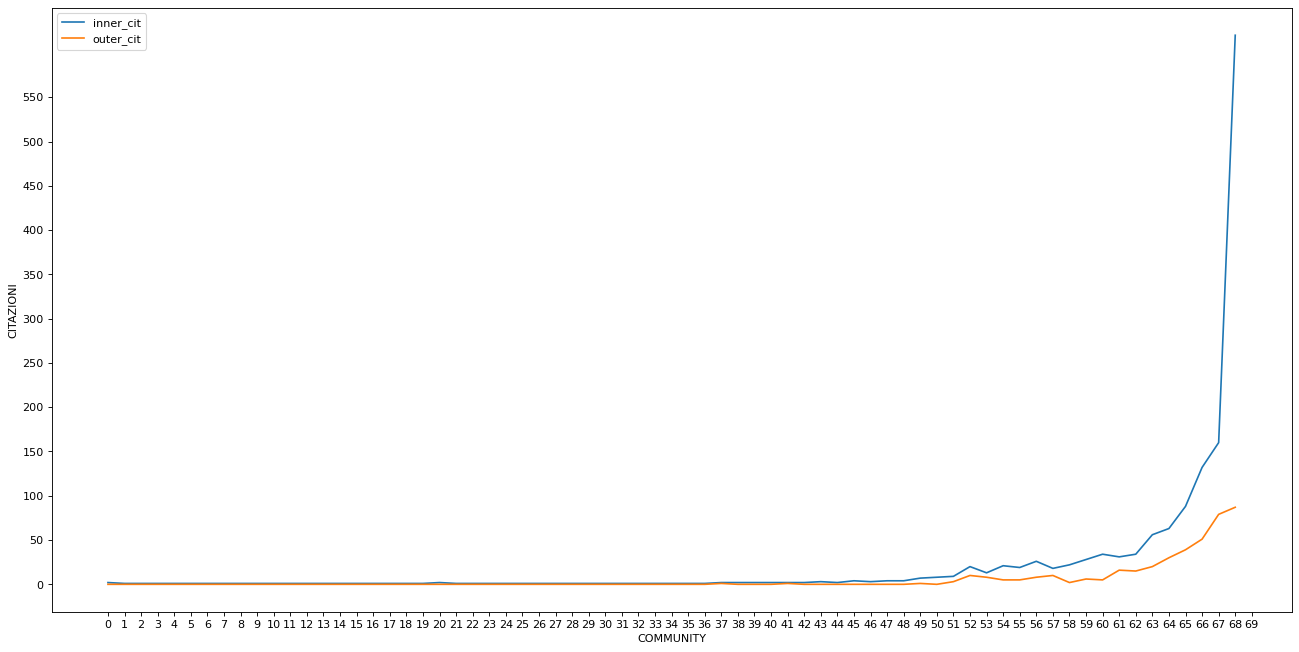

In [147]:
#plt.plot(communities_comparison_df.index.values, communities_comparison_df['num_inner_cit'].values, label = "inner_cit")
#plt.plot(communities_comparison_df.index.values, communities_comparison_df['num_outer_cit'].values, label = "outer_cit")
#plt.legend()
#plt.axis([0, 70, 0, 100])
#plt.show()



figure(figsize=(20, 10), dpi=80)
plt.xticks(np.arange(0, 70, step=1)) 
plt.yticks(np.arange(0, 600, step=50))
plt.plot(communities_comparison_df.index.values, communities_comparison_df['num_inner_cit'].values, label = "inner_cit")
plt.plot(communities_comparison_df.index.values, communities_comparison_df['num_outer_cit'].values, label = "outer_cit")
plt.xlabel('COMMUNITY')
plt.ylabel('CITAZIONI')
plt.legend()

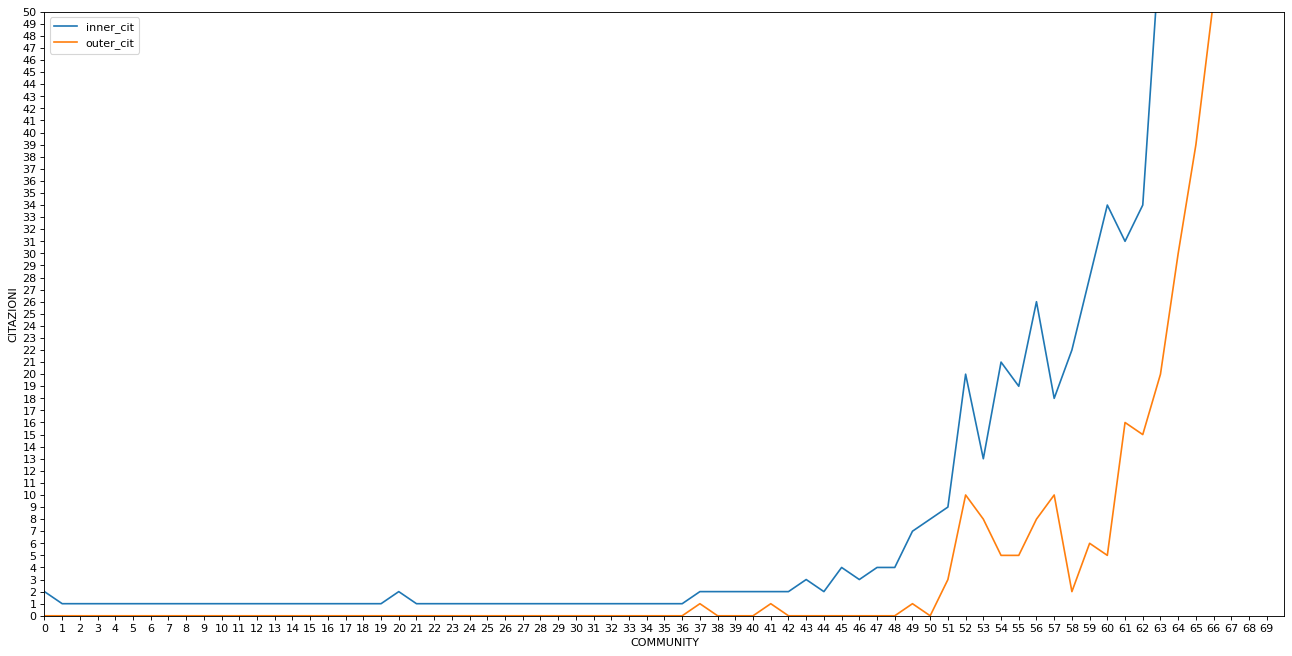

In [149]:
figure(figsize=(20, 10), dpi=80)
plt.xticks(np.arange(0, 70, step=1)) 
plt.yticks(np.arange(0, 60, step=1))
plt.xlabel('COMMUNITY')
plt.ylabel('CITAZIONI')
plt.axis([0, 70, 0, 50])
plt.plot(communities_comparison_df.index.values, communities_comparison_df['num_inner_cit'].values, label = "inner_cit")
plt.plot(communities_comparison_df.index.values, communities_comparison_df['num_outer_cit'].values, label = "outer_cit")
plt.legend()


Cosine sim

In [155]:
from strsimpy.cosine import Cosine

cosine = Cosine(2)
s0 = 'My string'
s1 = 'My string'
p0 = cosine.get_profile(s0)
p1 = cosine.get_profile(s1)
print(cosine.similarity_profiles(p0, p1))

0.9999999999999998


In [159]:
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity

a_file = ['a', 'b', 'c']
b_file = ['b', 'x', 'y', 'z']

# count word occurrences
a_vals = Counter(a_file)
b_vals = Counter(b_file)

# convert to word-vectors
words  = list(a_vals.keys() | b_vals.keys())
a_vect = [a_vals.get(word, 0) for word in words]       
b_vect = [b_vals.get(word, 0) for word in words]        

# find cosine
len_a  = sum(av*av for av in a_vect) ** 0.5             
len_b  = sum(bv*bv for bv in b_vect) ** 0.5             
dot    = sum(av*bv for av,bv in zip(a_vect, b_vect))   
cosine = dot / (len_a * len_b) 

print(cosine)
print(cosine_similarity([a_vect], [b_vect]))

0.2886751345948129
[[0.28867513]]


Compare the cos sim of title within a cluster with title outside


In [ ]:
for i in DF.columns.values:
    DF.loc[i][i] = 0


inner_avg_sim = []
outer_avg_sim = []

for i in range(len(Best_Clusters_DF)): #per ogni cluster
    inner_authors = Best_Clusters_DF.iloc[i]['cluster_authors'].split("-")
    #print(inner_authors)
    
    outer_authors = DF.columns.values
    #print(len(outer_authors))
    
    for j in inner_authors:
        outer_authors = np.delete(outer_authors, np.argwhere(outer_authors == j))
    #print(len(outer_authors))
    
    inner = 0
    outer = 0
    
    for j in inner_authors: #per ogni autore nel cluster
        inner += DF.loc[j][inner_authors].sum()        
        outer += DF.loc[j][outer_authors].sum()
        
    inner_cit.append(inner)
    outer_cit.append(outer)
        

communities_comparison_df = pd.DataFrame(columns=['num_inner_cit','num_outer_cit'])
communities_comparison_df['num_inner_cit'] = inner_cit
communities_comparison_df['num_outer_cit'] = outer_cit
communities_comparison_df
